# Implementation of Reinforcement Learning algorithms for cliffwalking environment

In [1]:
import gym
import gym.spaces
import numpy as np
import random
import scipy
import matplotlib.pyplot as plot

#Cliffwalking gym environment
env = gym.make('Taxi-v3')

In [2]:
def execute():
    print ("Ausführungsphase")
    # Umgebung zurücksetzen
    env.reset()
    # Variablen initialisieren
    done = False
    steps = 0
    score = 0
    
    while(done == False):
        # Bewertung der Aktionen:
        # -100 für Fallen (Cliff)
        # -1 für alle anderen Aktionen
        # next_state, reward, done, _ = env.step(action)
        # 0 = Up, 1 = Right, 2 = Down, 3 = Left
        
        # Zählt die Schritte bis zum Spielende
        steps += 1
        # Wählt eine zufällige Aktion aus allen verfügbaren (dem action_space)
        action = env.action_space.sample() 
              
        # Führe die ausgewählte Aktion aus
        _, reward, done,_ = env.step(action)
        
        score += reward
        
    print (f"Schritte: {steps}, Ergebnis: {score}")

In [3]:
execute()
env.render()

Ausführungsphase
Schritte: 1678, Ergebnis: -15439
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  x



In [2]:
# Agent.py
 
import numpy as np
 
class Agent:
    """
    The Base class that is implemented by
    other classes to avoid the duplicate 'choose_action'
    method
    """
    def choose_action(self, state):
        action = 0
        if np.random.uniform(0, 1) < self.epsilon:
            action = self.action_space.sample()
        else:
            action = np.argmax(self.Q[state, :])
        return action

## Q-Learning

In [3]:
class QLearningAgent(Agent):
    def __init__(self, epsilon, alpha, gamma, num_state, num_actions, action_space):
        """
        Constructor
        Args:
            epsilon: The degree of exploration
            gamma: The discount factor
            num_state: The number of states
            num_actions: The number of actions
            action_space: To call the random action
        """
        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma
        self.num_state = num_state
        self.num_actions = num_actions
 
        self.Q = np.zeros((self.num_state, self.num_actions))
        self.action_space = action_space
        
    def update(self, state, next_state, reward, action, next_action):
        """
        Update the action value function using the Q-Learning update.
        Q(S, A) = Q(S, A) + alpha(reward + (gamma * Q(S_, A_) - Q(S, A))
        Args:
            state: The current state
            next_state: The next state
            reward: The reward for taking the respective action
            action: The current action
            next_action: The next action
        Returns:
            None
        """
        target = reward + self.gamma * np.max(self.Q[next_state, :])
        self.Q[state, action] += self.alpha * (target - self.Q[state, action])

# SARSA

In [4]:
class SarsaAgent(Agent):
    """
    The Agent that uses SARSA update to improve it's behaviour
    """
    def __init__(self, epsilon, alpha, gamma, num_state, num_actions, action_space):
        """
        Constructor
        Args:
            epsilon: The degree of exploration
            gamma: The discount factor
            num_state: The number of states
            num_actions: The number of actions
            action_space: To call the random action
        """
        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma
        self.num_state = num_state
        self.num_actions = num_actions
 
        self.Q = np.zeros((self.num_state, self.num_actions))
        self.action_space = action_space
 
    def update(self, state, next_state, reward, action, next_action):
        """
        Update the action value function using the SARSA update.
        Q(S, A) = Q(S, A) + alpha(reward + (gamma * Q(S_, A_) - Q(S, A))
        Args:
            state: The current state
            next_state: The next state
            reward: The reward for taking the respective action
            action: The current action
            next_action: The next action
        Returns:
            None
        """
        target = reward + self.gamma * self.Q[next_state, next_action]
        self.Q[state, action] += self.alpha * (target - self.Q[state, action])

## Double Q

In [5]:
class DoubleQAgent(Agent):
    def __init__(self, epsilon, alpha, gamma, num_state, num_actions, action_space):
        """
        Constructor
        Args:
            epsilon: The degree of exploration
            gamma: The discount factor
            num_state: The number of states
            num_actions: The number of actions
            action_space: To call the random action
        """
        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma
        self.num_state = num_state
        self.num_actions = num_actions
 
        self.Q1 = np.zeros((self.num_state, self.num_actions))
        self.Q2 = np.zeros((self.num_state, self.num_actions))
        self.Q = np.zeros((self.num_state, self.num_actions))
        self.action_space = action_space
    def update(self, state, next_state, reward, action, next_action):
        """
        Update the action value function using the Double-Q update.
        Q1(S, A) = Q1(S, A) + alpha(reward + (gamma * Q2(S_, A_) - Q1(S, A))
        or
        Q2(S, A) = Q2(S, A) + alpha(reward + (gamma * Q1(S_, A_) - Q2(S, A))
        Args:
            state: The previous state
            next_state: The next state
            reward: The reward for taking the respective action
            prev_action: The previous action
            next_action: The next action
        Returns:
            None
        """
        if np.random.rand() < 0.5:
            target = reward + self.gamma * self.Q2[next_state, np.argmax(self.Q1[next_state])]
            self.Q1[state, action] += self.alpha * (target - self.Q1[state, action])
            
        else:
            target = reward + self.gamma * self.Q1[next_state, np.argmax(self.Q2[next_state])]
            self.Q2[state, action] += self.alpha * (target - self.Q2[state, action])
            
        self.Q = self.Q1 + self.Q2  
    

## Expected Sarsa

In [6]:
class ExpectedSarsaAgent(Agent):
    def __init__(self, epsilon, alpha, gamma, num_state, num_actions, action_space):
        """
        Constructor
        Args:
            epsilon: The degree of exploration
            gamma: The discount factor
            num_state: The number of states
            num_actions: The number of actions
            action_space: To call the random action
        """
        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma
        self.num_state = num_state
        self.num_actions = num_actions
 
        self.Q = np.zeros((self.num_state, self.num_actions))
        self.action_space = action_space
    def update(self, state, next_state, reward, action, next_action):
        """
        Update the action value function using the Expected SARSA update.
        Q(S, A) = Q(S, A) + alpha(reward + sum(pi * Q(S_, A_) - Q(S, A))
        Args:
            state: The current state
            next_state: The next state
            reward: The reward for taking the respective action
            action: The current action
            next_action: The next action
        Returns:
            None
        """ 
 
        expected_q = 0
        q_max = np.max(self.Q[next_state, :])
        greedy_actions = 0
        for i in range(self.num_actions):
            if self.Q[next_state][i] == q_max:
                greedy_actions += 1
     
        non_greedy_action_probability = self.epsilon / self.num_actions
        greedy_action_probability = ((1 - self.epsilon) / greedy_actions) + non_greedy_action_probability
 
        for i in range(self.num_actions):
            if self.Q[next_state][i] == q_max:
                expected_q += self.Q[next_state][i] * greedy_action_probability
            else:
                expected_q += self.Q[next_state][i] * non_greedy_action_probability
 
        target = reward + self.gamma * expected_q
        self.Q[state, action] += self.alpha * (target - self.Q[state, action])

## Execution and Analysis

SarsaAgent
Iteration: 0, Score: -280
Iteration: 100, Score: -127
Iteration: 200, Score: -35
Iteration: 300, Score: -244
Iteration: 400, Score: 3
Iteration: 500, Score: 4
Iteration: 600, Score: 6
Iteration: 700, Score: -1
Iteration: 800, Score: 6
Iteration: 900, Score: -2
Iteration: 1000, Score: 5
Iteration: 1100, Score: -4
Iteration: 1200, Score: 7
Iteration: 1300, Score: 9
Iteration: 1400, Score: 9
Iteration: 1500, Score: 8
Iteration: 1600, Score: 5
Iteration: 1700, Score: 12
Iteration: 1800, Score: 10
Iteration: 1900, Score: 10


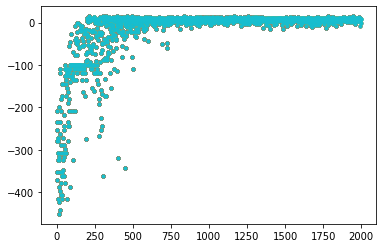

QLearningAgent
Iteration: 0, Score: -352
Iteration: 100, Score: -141
Iteration: 200, Score: -109
Iteration: 300, Score: 13
Iteration: 400, Score: -16
Iteration: 500, Score: -1
Iteration: 600, Score: -5
Iteration: 700, Score: 2
Iteration: 800, Score: 4
Iteration: 900, Score: 11
Iteration: 1000, Score: 5
Iteration: 1100, Score: 7
Iteration: 1200, Score: 3
Iteration: 1300, Score: 11
Iteration: 1400, Score: 9
Iteration: 1500, Score: 5
Iteration: 1600, Score: 10
Iteration: 1700, Score: 8
Iteration: 1800, Score: 14
Iteration: 1900, Score: 4


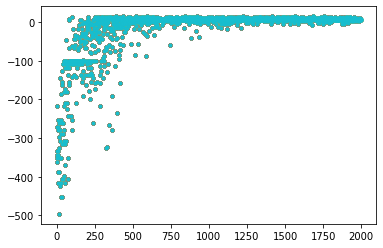

DoubleQAgent
Iteration: 0, Score: -289
Iteration: 100, Score: -244
Iteration: 200, Score: -157
Iteration: 300, Score: -181
Iteration: 400, Score: -226
Iteration: 500, Score: 12
Iteration: 600, Score: 8
Iteration: 700, Score: -19
Iteration: 800, Score: 9
Iteration: 900, Score: 4
Iteration: 1000, Score: 8
Iteration: 1100, Score: 9
Iteration: 1200, Score: 11
Iteration: 1300, Score: 6
Iteration: 1400, Score: 6
Iteration: 1500, Score: 4
Iteration: 1600, Score: 9
Iteration: 1700, Score: 6
Iteration: 1800, Score: 9
Iteration: 1900, Score: 13


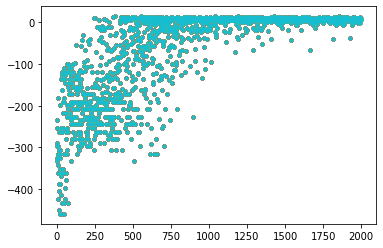

ExpectedSarsaAgent
Iteration: 0, Score: -325
Iteration: 100, Score: -100
Iteration: 200, Score: -31
Iteration: 300, Score: -208
Iteration: 400, Score: 12
Iteration: 500, Score: 13
Iteration: 600, Score: 5
Iteration: 700, Score: 10
Iteration: 800, Score: 4
Iteration: 900, Score: 8
Iteration: 1000, Score: 6
Iteration: 1100, Score: 9
Iteration: 1200, Score: 6
Iteration: 1300, Score: 11
Iteration: 1400, Score: 6
Iteration: 1500, Score: 8
Iteration: 1600, Score: 9
Iteration: 1700, Score: 6
Iteration: 1800, Score: 8
Iteration: 1900, Score: 5


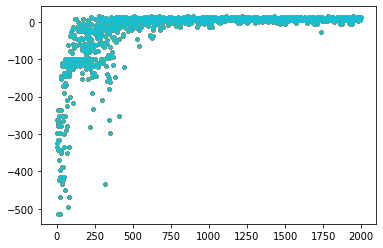

SARSA Average Sum of Reward: -16.052
Q-Learning Average Sum of Return: -15.021
Double-Q Average Sum of Return: -50.513
Expected Sarsa Average Sum of Return: -15.2765


In [10]:
# Defining all the required parameters
epsilon = 0.1
total_episodes = 2000
max_steps = 100
alpha = 0.5
gamma = 1

"""
    The two parameters below are used to calculate
    the reward by each algorithm
"""
episodeReward = 0
totalReward = {
    'SarsaAgent': [],
    'QLearningAgent': [],
    'DoubleQAgent': [],
    'ExpectedSarsaAgent': []
}
 
# Defining all the agents
expectedSarsaAgent = ExpectedSarsaAgent(
    epsilon, alpha, gamma, env.observation_space.n,
    env.action_space.n, env.action_space)
qLearningAgent = QLearningAgent(
    epsilon, alpha, gamma, env.observation_space.n,
    env.action_space.n, env.action_space)
doubleQAgent = DoubleQAgent(
    epsilon, alpha, gamma, env.observation_space.n,
    env.action_space.n, env.action_space)
sarsaAgent = SarsaAgent(
    epsilon, alpha, gamma, env.observation_space.n,
    env.action_space.n, env.action_space)
 
# Now we run all the episodes and calculate the reward obtained by
# each agent at the end of the episode
 
agents = [sarsaAgent, qLearningAgent, doubleQAgent, expectedSarsaAgent]
 
for agent in agents:
    print(type(agent).__name__)
    scores = []
    for episode in range(total_episodes):
        # Initialize the necessary parameters before
        # the start of the episode
        t = 0
        state1 = env.reset()
        action1 = agent.choose_action(state1)
        episodeReward = 0
        while t < max_steps:
 
            # Getting the next state, reward, and other parameters
            state2, reward, done, info = env.step(action1)
     
            # Choosing the next action
            action2 = agent.choose_action(state2)
             
            # Learning the Q-value
            agent.update(state1, state2, reward, action1, action2)
     
            state1 = state2
            action1 = action2
             
            # Updating the respective vaLues
            t += 1
            episodeReward += reward
             
            # If at the end of learning process
            if done:
                break
                
        scores.append(episodeReward)
        # Plot episode Rewards
        plot.plot(scores, ".")
        # Append the sum of reward at the end of the episode
        totalReward[type(agent).__name__].append(episodeReward)
        
        # Show reward every 100 episodes
        if(episode % 100 == 0):
            print (f"Iteration: {episode}, Score: {episodeReward}")
            
        # Epsilon reduction (if still over a specific minimum)
        if (agent.epsilon > 0.01):
            agent.epsilon *= 0.98
        
    plot.show()
    
env.close()
 
# Calculate the mean of sum of returns for each episode
meanReturn = {
    'SARSA-Agent': np.mean(totalReward['SarsaAgent']),
    'Q-Learning-Agent': np.mean(totalReward['QLearningAgent']),
    'Double-Q-Agent': np.mean(totalReward['DoubleQAgent']),
    'Expected-SARSA-Agent': np.mean(totalReward['ExpectedSarsaAgent'])
}
 
# Print the results
print(f"SARSA Average Sum of Reward: {meanReturn['SARSA-Agent']}")
print(f"Q-Learning Average Sum of Return: {meanReturn['Q-Learning-Agent']}")
print(f"Double-Q Average Sum of Return: {meanReturn['Double-Q-Agent']}")
print(f"Expected Sarsa Average Sum of Return: {meanReturn['Expected-SARSA-Agent']}")

In [12]:
for agent in agents:
    print ("Executing", type(agent).__name__)
        
    # reset env and initialize variables
    done = False
    state = env.reset()
    score = 0
    steps = 0
        
    env.render()
    
    while(done == False):
        # Count steps
        steps += 1
        # Choose action according to policy
        action = np.argmax(agent.Q[state, :])
        # Execute action
        next_state, reward, done, _ = env.step(action)
        score += reward
        # Continue
        state = next_state
        
        env.render()
            
        
    print ((f"Steps to goal: {steps}, Score: {score}"))

Executing SarsaAgent
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | :_:G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | :_: |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : |_: |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| 